# Visualize Software Entropy

To be ported to one notebook with data processing.

In [40]:
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from github import Auth, Github
from plotly.subplots import make_subplots

# set plotly default theme
pio.templates.default = "plotly_white"

# read example data which includes pubmed github links detected from article abstracts
df = pd.read_parquet("repository_analysis_results.parquet")
df

,Repository URL,Normalized Total Entropy,Date of First Commit,Date of Last Commit,Time of Existence (days)
0,https://github.com/jtchavisIII/CU-MSDSp,0.201187,2020-08-18,2021-04-20,245
1,https://github.com/SunXQlab/EnDecon,0.160978,2022-11-11,2023-02-27,107
2,https://github.com/ollisa/BELMM,0.054259,2023-05-11,2023-09-23,134


In [41]:
github_client = Github(
    auth=Auth.Token(os.environ.get("ALMANACK_ANALYSIS_GH_TOKEN")), per_page=100
)


def gather_stars(link):
    try:
        return github_client.get_repo(
            link.replace("https://github.com/", "")
        ).stargazers_count
    except:
        return None


df["GitHub Stars"] = df["Repository URL"].apply(gather_stars)

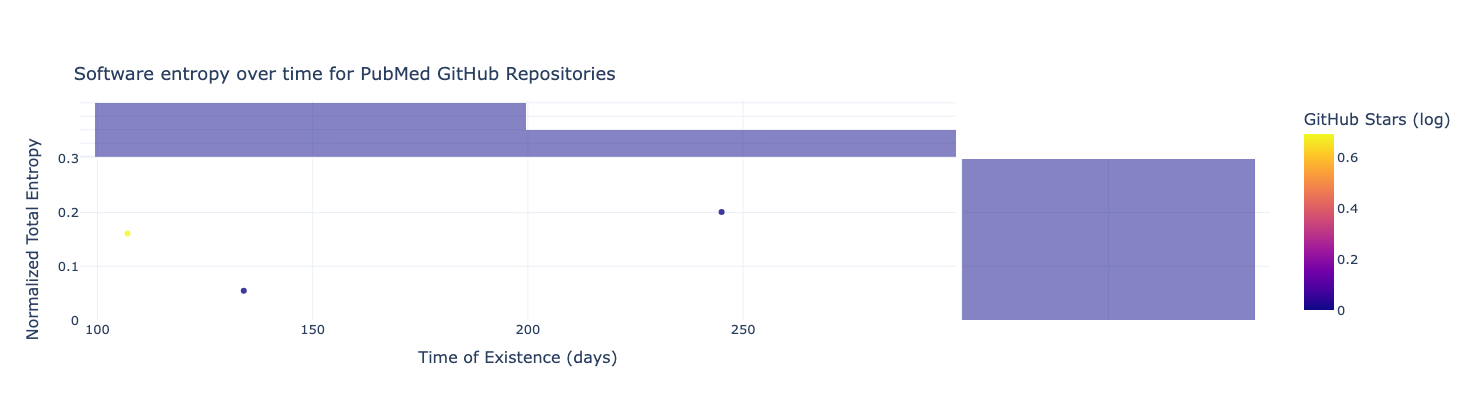

In [42]:
df["GitHub Stars (log)"] = np.log(
    df["GitHub Stars"].apply(
        # move 0's to None to avoid divide by 0
        lambda x: x if x > 0 else None
    )
)

fig = px.scatter(
    df.dropna().sort_values(by="GitHub Stars"),
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=800,
    height=400,
    title="Software entropy over time for PubMed GitHub Repositories",
    marginal_x="histogram",
    marginal_y="histogram",
    opacity=0.8,
    color="GitHub Stars (log)",
)

fig.update_layout(
    font=dict(size=13), title={"yref": "container", "y": 0.8, "yanchor": "bottom"}
)
fig.write_image("software-information-entropy.png")
fig.show()